# Лабораторная работа №4. Кластеризация <br>
Работа выполнена студентом гр. 4217 Мазориевым У.А. <br>
Вариант №10

##**Цель работы**
 <br>
Изучение алгоритмов и методов кластеризации на практике.

### **Часть 1**

Импортируются нужные библиотеки, создается функция которая принимает два аргумента n (количество точек для каждого кластера) и seed (значение для установки начального состояние генератора случайных чисел, для того чтобы данные могли воспроизводиться при повторных запусках).

Далее создается матрица которая будет задавать центры кластеров по двум координатам, после создается трехмерный массив (3 — количество кластеров, 2 — двумерное пространство, n — количество точек в каждом кластере).

Затем меняется форма массива и данные масштабируются, в результате создается датафрейм содержащий значения по x и y для 3 кластеров.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def make_data(n, seed):
  np.random.seed(seed)
  shift_matrix = np.array([[3, 3], [6, 9], [9, 3]])
  data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
  data = np.swapaxes(data, 1, 2)
  data = data.reshape((-1, 2))
  data *= np.array([[20, 0.5]])
  df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},columns=['x', 'y'])
  df = df.sample(frac=1.0)
  return df

Далее генерируются тренировочные и тестовый набор данных

In [ ]:
train = make_data(n=70, seed=0)
test = make_data(n=30, seed=1)

Данные стандартизируются, чтобы они имели среднее значение 0 и стандартное отклонение 1, для того чтобы улучшить производительность алгоритмов кластеризации.
- fit_transform сразу находит параметры стандартизации и применяет их к train

In [ ]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

Модель `KMeans` инициализируется с количеством кластеров, равным 3, и применяется к тренировочным данным.
Метод `fit_predict` одновременно обучает модель и предсказывает кластеры для каждого наблюдения.

Суть модели `KMeans`, работает хорошо на шарообразных кластерах:
1. k - кол-во кластеров, задается пользователем
2. Выбираются центроиды
3. Считается расстояние до каждой центроиды, минимальное расстояние - принадлежность к центроиде (кластеру)
4. Меняется расположение центроиды, считается усредненной значение по всем точкам, которые принадлежат к кластеру
5. Повторяется 3-4 пункт, пока сдвиг центроиды существенный

Метод `KMeans++` удаляет центроиды друг от друга на максимальное расстояние до точки на плоскости, что оптимизирует работу модели и улучшает результат разбиения

Кластеры визуализируются на графике, где точки окрашиваются в зависимости от их принадлежности к кластеру, а центры кластеров отмечаются красными крестиками.

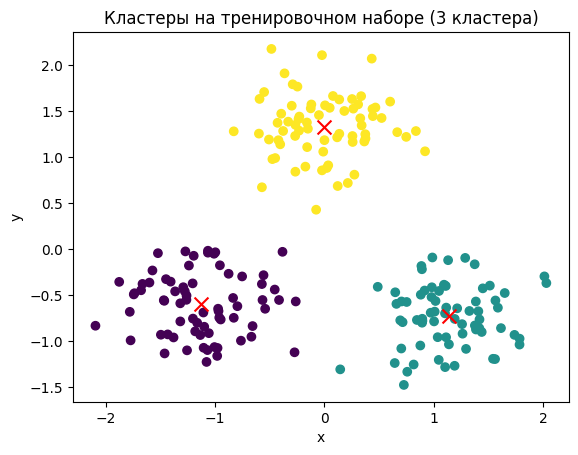

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
train_clusters = kmeans.fit_predict(train_scaled)

plt.scatter(train_scaled[:, 0], train_scaled[:, 1], c=train_clusters, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x', s=100)
plt.title('Кластеры на тренировочном наборе (3 кластера)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Модель, которая была получена вследствии обучения набором данных, имела высокую точность распределения на кластеры. Полученные наборы распределялись на три явно сконцетрированные в разных частях диаграммы группы. Центры кластеров также были визуально правильно отмечены.

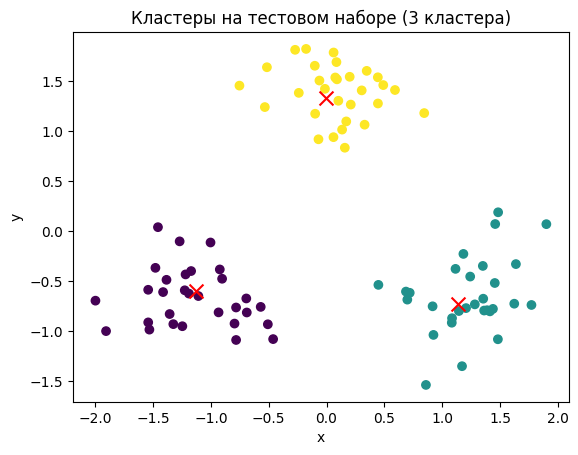

In [ ]:
test_clusters = kmeans.predict(test_scaled)

plt.scatter(test_scaled[:, 0], test_scaled[:, 1], c=test_clusters, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x', s=100)
plt.title('Кластеры на тестовом наборе (3 кластера)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Предсказанные значения были точно распределены на ранее полученные кластеры. Полученная модель довольно точно могла определять принадлежность к определенному кластеру. Центры кластеров также были отмечены в местах, очень близких к предыдущим.

Также рассчитывается Коэффициент силуэта.

Коэффициент силуэта (Silhouette Score) - это метрика, используемая для оценки качества кластеризации данных. Он предоставляет меру того, насколько объект хорошо соответствует своему собственному кластеру по сравнению с другими кластерами. Значение коэффициента силуэта находится в диапазоне от -1 до 1.

Основные характеристики коэффициента силуэта:

Значение близкое к 1 указывает на хорошую кластеризацию, где объекты внутри кластеров компактны и хорошо отделены от других кластеров.

Значение близкое к 0 указывает на перекрывание кластеров или на точки, находящиеся на границе между кластерами.

Отрицательные значения обычно указывают на неправильную кластеризацию.

Вычисление коэффициента силуэта обычно выполняется для каждого объекта по отношению к другим объектам в том же кластере и объектам в ближайшем соседнем кластере.

In [ ]:
silhouette_avg1 = silhouette_score(train_scaled, train_clusters)
print(f'Коэффициент силуэта для 3 кластеров: {silhouette_avg1}')


Коэффициент силуэта для 3 кластеров: 0.6983150355880932


Коэффициент силуэта для 2 кластеров: 0.4549871061208347


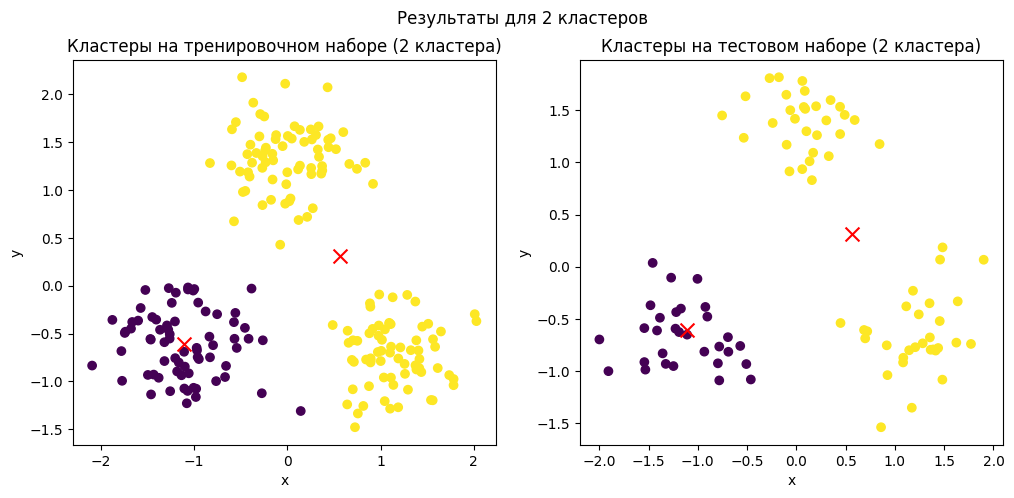

Коэффициент силуэта для 4 кластеров: 0.5800248774970442


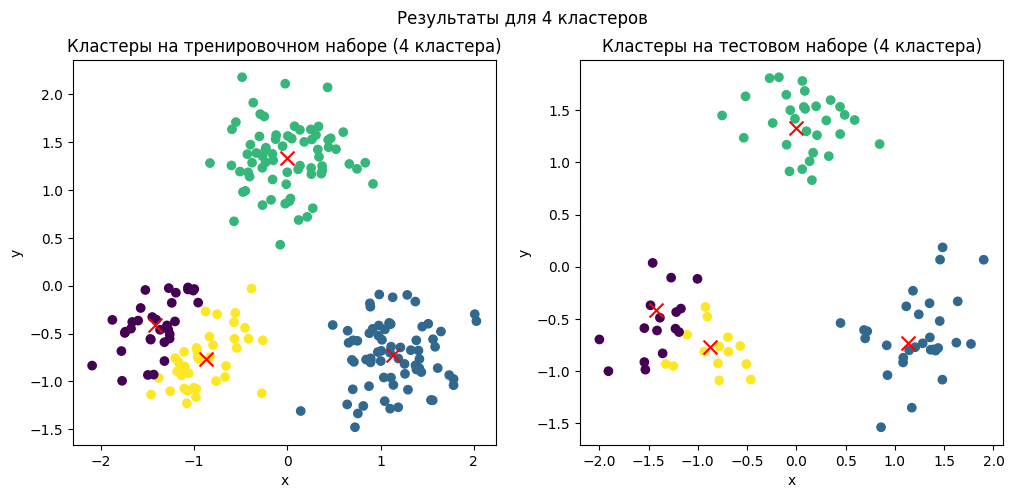

In [ ]:
for n_clusters in [2, 4]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    train_clusters = kmeans.fit_predict(train_scaled)
    test_clusters = kmeans.predict(test_scaled)

    silhouette_avg = silhouette_score(train_scaled, train_clusters)
    print(f'Коэффициент силуэта для {n_clusters} кластеров: {silhouette_avg}')

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(train_scaled[:, 0], train_scaled[:, 1], c=train_clusters, cmap='viridis', marker='o')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x', s=100)
    plt.title(f'Кластеры на тренировочном наборе ({n_clusters} кластера)')
    plt.xlabel('x')
    plt.ylabel('y')

    plt.subplot(1, 2, 2)
    plt.scatter(test_scaled[:, 0], test_scaled[:, 1], c=test_clusters, cmap='viridis', marker='o')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x', s=100)
    plt.title(f'Кластеры на тестовом наборе ({n_clusters} кластера)')
    plt.xlabel('x')
    plt.ylabel('y')

    plt.suptitle(f'Результаты для {n_clusters} кластеров')
    plt.show()

Данные были разделены на 2 кластера и 4 кластера. После визуализации данных было замечено неуместность применения этих вариантов. В одном случае центр не имел координату, где не было ни одной точки из набора. В другом случае, при 4 кластерах было излишнее разделение, что может привести к переобучению, для проверки гипотезы о том, что 3 кластера наиболее подходящий вариант используется метод локтя, также при сравнении значений кф силуэта можно заметить, что при 3 кластеров кф силуэта самый высокий, это указывает на достаточно хорошую кластреризацию, что доказывается и визуально
- Коэффициент силуэта для 3 кластеров: 0.6983150355880932
- Коэффициент силуэта для 2 кластеров: 0.4549871061208347
- Коэффициент силуэта для 4 кластеров: 0.5800248774970442



Далее строится график локтя

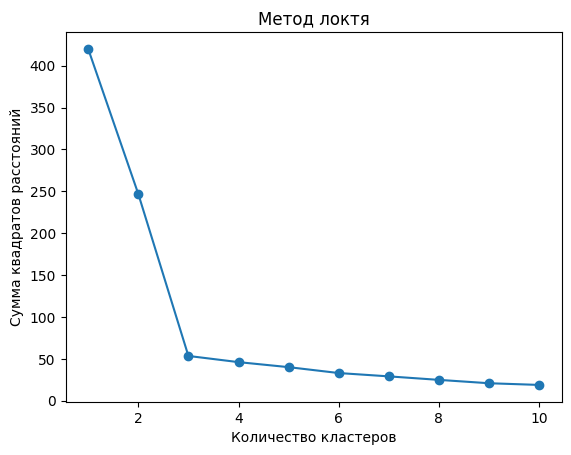

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(train_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Метод локтя')
plt.show()


В точке 3 увеличение числа кластеров перестает существенно уменьшать сумму квадратов расстояний, и этот момент считается оптимальным числом кластеров, следовательно, гипотеза о трех кластерах верна.

### **Часть 2**

Для начала файл считывается с помощью библиотеки pandas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics import fowlkes_mallows_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5gym_churn.csv')
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


 Файл содержит информацию о клиентах фитнес клуба:
 1. Пол
 2. Близкое расположение
 3. Сотрудник компании партнера
 4. По промо друзей
 5. Указан ли телефон
 6. Длительность текущего абонемента
 7. Посещение групповых занятий
 8. Возраст
 9. Средние траты на дополнительные услуги
 10. Количество месяцев до окончания абонемента
 11. время с момента первого обращения в фитнесцентр (в месяцах)
 12. средняя частота посещений в неделю за все время с начала действия абонемента
 13. средняя частота посещений в неделю за предыдущий месяц
 14. Churn – факт ухода из клуба


 Далее датасет проверяется на наличие дубликатов, видно, что файл не имеет пропусков, а также все типы данных верно присвоены, так как в датасете только числовые значения, проверять его на неявные дубликаты нет смысла.

In [ ]:
df.info()
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Дубликатов не нашлось, все типы данных присвоены правильно, далее выбирается целевая переменная, которая не будет включаться в модель наших данных. В качестве целевой переменной был выбран факт ухода из клуба.

In [ ]:
target = df['Churn']
features = df.drop(columns=['Churn'])

Далее строится матрцица диаграмм рассеивания

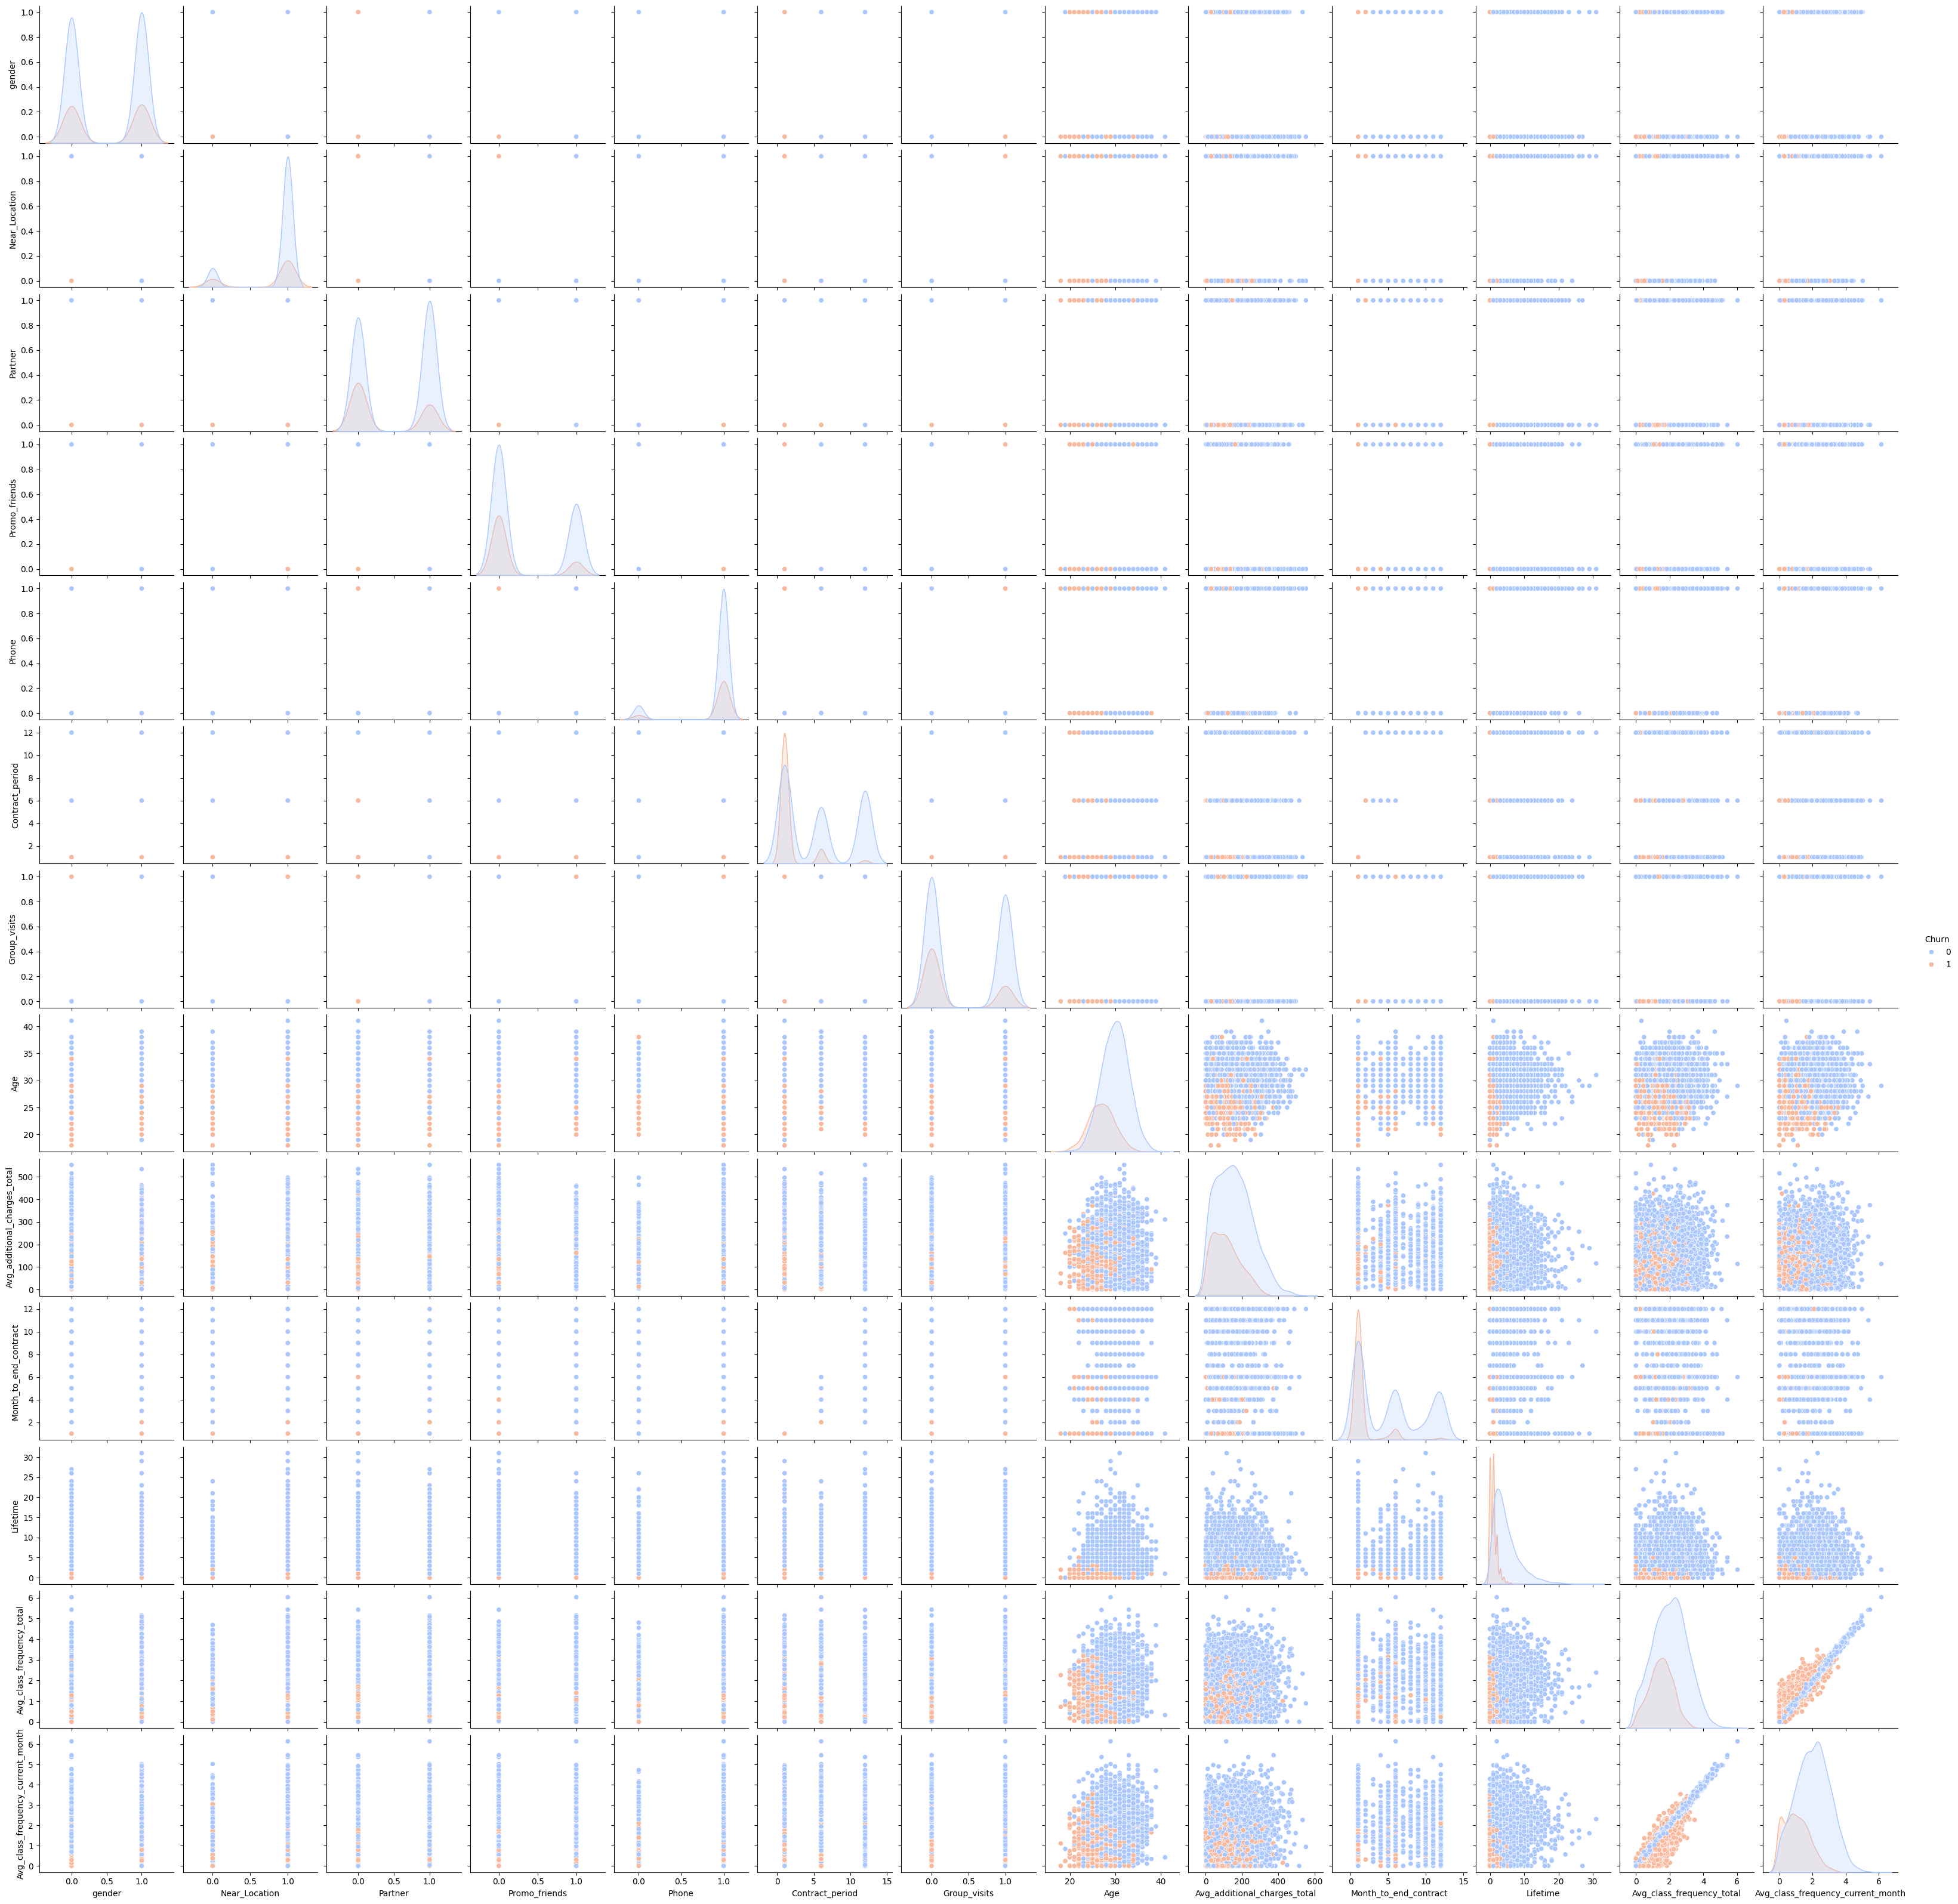

In [ ]:
sns.pairplot(df, hue='Churn', palette='coolwarm')
plt.show()

Матрица диаграмм рассеяния показала связь двух параметров, а также пренадлежность данной точки к факту уходу из клуба. На матрице диаграмм рассеяния была видна закономерность - оранжевые точки  в основном располагались в нижних левых частях диаграмм рессеяния (небольшие значения двух рассматриваемых параметров). Синие точки большие значения по сравнению с первым классом. Однако, некоторые значения второго класса могли находиться в нижнем левом углу диаграммы там, где находились оранжевые значения значения.

Для улучшения производительности k-means кластеризации данные стандартизируются

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

После стандартизации подбирается оптимальное количество кластеров с помощью метода локтя.

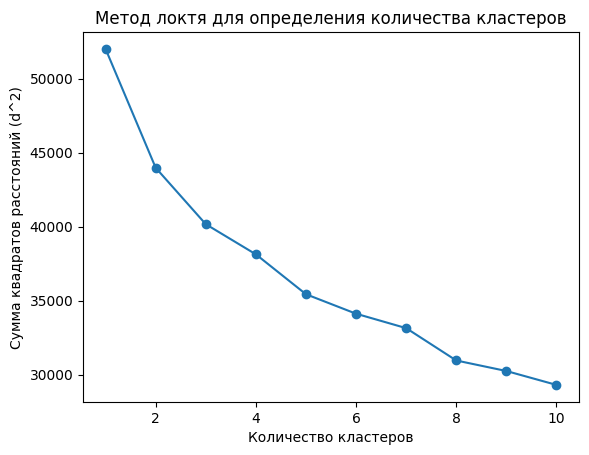

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний (d^2)')
plt.title('Метод локтя для определения количества кластеров')
plt.show()

По графику видно, что локоть находится на 3-4 уровне, при k = 3 или k = 4 можно получить хорошие кластеры, не усложняя модель. Далее модель обучается с числом кластером 3.

Далее данные группируются по меткам кластеров, и для каждого кластера вычисляются средние значения числовых признаков.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_features)
cluster_means = df.groupby('Cluster').mean()
print("Средние значения признаков для каждого кластера:")
cluster_means

Средние значения признаков для каждого кластера:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Cluster,,,,,,,,,,,,,,
0,0.484611,0.760410,0.376584,0.183464,0.907664,1.857574,0.290284,28.089922,128.563255,1.769463,2.243814,1.230782,0.974449,0.558841
1,0.548696,0.869565,0.348696,0.224348,0.903478,2.487826,0.454783,30.017391,157.970201,2.315652,4.852174,2.739774,2.730350,0.086087
2,0.508801,0.939648,0.772842,0.563286,0.897737,10.717519,0.540654,29.901090,161.843979,9.803856,4.694887,1.949651,1.939349,0.030176


Полученные данные показывают
- Кластер 0 содержит клиентов с более короткими контрактами и более высокой вероятностью оттока.
- Кластер 1 это клиенты со средней активностью, частыми посещениями, но меньшей вероятностью оттока.
- Кластер 2 характеризуется длительными контрактами и низким уровнем оттока.

Далее подсчитываются основным метрики качества для оценки работы нашей модели k-means
* Adjusted Rand Index (ARI): ARI измеряет сходство между кластеризацией и исходными метками, учитывая случайное совпадение.

* Adjusted Mutual Information (AMI): AMI измеряет степень совместной информации между кластерами и исходными метками.


* Homogeneity, Completeness: Эти метрики оценивают, насколько однородны, полны и сбалансированы кластеры.

* Silhouette Score: Эта метрика измеряет, насколько объекты в кластерах схожи между собой и насколько они отличаются от объектов в других кластерах.


In [ ]:
ari = adjusted_rand_score(target, df['Cluster'])
ami = adjusted_mutual_info_score(target, df['Cluster'])
homogeneity = homogeneity_score(target, df['Cluster'])
completeness = completeness_score(target, df['Cluster'])
silhouette_avg = silhouette_score(scaled_features, df['Cluster'])

# Вывод метрик
print(f'ARI: {ari}')
print(f'AMI: {ami}')
print(f'Homogeneity: {homogeneity}')
print(f'Completeness: {completeness}')
print(f'Silhouette: {silhouette_avg}')

ARI: -0.06218170629649298
AMI: 0.09574327937654833
Homogeneity: 0.09381417155114637
Completeness: 0.09817123822160997
Silhouette: 0.11698964081320212


- ARI и AMI: Значения близкие к нулю, низкий уровень схожести между кластерами и истинными метками. Это может указывать на недостаточное качество кластеризации, возможно, что стоит применить другой метод кластеризации.
- Homogeneity и Completeness: Метрики показывают, как хорошо кластеры представляют истинные классы. Показатели метрик плохи.
-Silhouette: Значение близкое к 1 указывает на хорошее разделение между кластерами. Значение 0.127 говорит о том, что кластеры недостаточно отделены друг от друга.

Для того, чтобы понять правильно ли выбралось кол-во кластеров, строится датафрейм, содержащие метрики при k = [2,11]

In [ ]:
results = {
    'Metric': ['ARI', 'AMI', 'Homogeneity', 'Completeness', 'Silhouette'],
    'KMeans': []
}

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    df['Cluster'] = kmeans.fit_predict(scaled_features)

    results['KMeans'].append([
        adjusted_rand_score(target, df['Cluster']),
        adjusted_mutual_info_score(target, df['Cluster']),
        homogeneity_score(target, df['Cluster']),
        completeness_score(target, df['Cluster']),
        silhouette_score(scaled_features, df['Cluster'])
    ])
metrics_df = pd.DataFrame(results['KMeans'], columns=results['Metric'])
metrics_df.index=range(2,11)
metrics_df

,ARI,AMI,Homogeneity,Completeness,Silhouette
2,0.030209,0.160132,0.171134,0.150759,0.164682
3,0.115596,0.203635,0.293006,0.156322,0.127012
4,0.091270,0.161217,0.273330,0.114648,0.110058
5,0.064280,0.121324,0.226471,0.083238,0.128577
6,0.051124,0.130620,0.266610,0.086905,0.113861
7,0.036824,0.123180,0.266185,0.080579,0.113194
8,0.032521,0.110494,0.249230,0.071478,0.122108
9,0.023939,0.114901,0.269986,0.073510,0.117887
10,0.022434,0.102317,0.253063,0.064682,0.111492


Можно сделать вывод, что действительно 3 кластера могут быть наиболее подходящим вариантом для задачи, обеспечивая лучший баланс между качеством кластеризации и количеством кластеров.

Создается модель иерархической кластеризации, для начала `AgglomerativeClustering` реализует саму кластеризацию, принимаются такие параметры как:
- `n_clusters=None` означает, что объединение продолжается до тех пор, пока не останется один кластер
- `distance_threshold=0`  означает, что модель будет продолжать объединение кластеров без остановки, чтобы построить полное дерево.
- `linkage='ward'` задает метод соединения кластеров: метод Уорда минимизирует сумму квадратов отклонений точек от их центроида.

Далее dendrogram строит дендрограмму.
- linkage_matrix содержит сами данные для построения.
- p=5 и truncate_mode='level' ограничивают уровень, который выведется на экран пользователя, в данном случае 5.

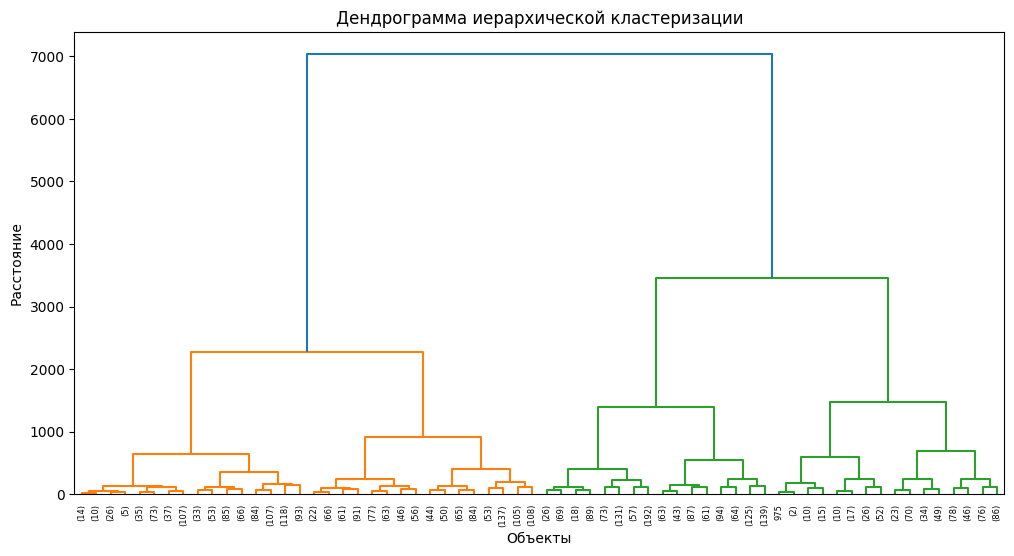

In [ ]:
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')
cluster_labels = clustering.fit_predict(features)
linkage_matrix = linkage(features, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, p=5, truncate_mode='level')
plt.title('Дендрограмма иерархической кластеризации')
plt.xlabel('Объекты')
plt.ylabel('Расстояние')
plt.show()

Приведенная дендрограмма показала, что деление на два кластера является одним из самых  рациональных решений. На значениях расстояния близких к нулю было выделено много кластеров. При увеличении расстояния отдельные кластеры объединялись в один, пока не выделились два основных кластера. Цифры, находящиеся в нижней части дендрограммы показывали количество записей, которые были уже объединены в кластеры.
Показывалось только пять верхних объеденений.

После показываются средния значения признаков для каждого кластера


In [ ]:
optimal_clusters = 2

clustering = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
df['Cluster'] = clustering.fit_predict(scaled_features)

cluster_means = df.groupby('Cluster').mean()
print("Средние значения признаков для каждого кластера:")
cluster_means

Средние значения признаков для каждого кластера:


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Cluster,,,,,,,,,,,,,,
0,0.524720,0.795979,0.425511,0.254120,0.872775,2.754779,0.381674,29.012854,141.429607,2.572841,3.545814,1.821080,1.67802,0.337508
1,0.464803,1.000000,0.679089,0.479296,1.000000,10.731884,0.508282,29.722567,164.262405,9.818841,4.286749,2.060995,2.04668,0.038302


- Кластер 0 содержит клиентов с более низкой лояльностью, меньшими сроками контрактов и более высоким уровнем оттока. Это может указывать на потребность в улучшении обслуживания или акциях для удержания клиентов.
- Кластер 1  представляет более лояльных клиентов с высокой частотой посещений, длительными контрактами, активными партнерами и минимальным оттоком. Это клиенты, которые, вероятно, получают большую выгоду от предлагаемых услуг.

In [ ]:
ari = adjusted_rand_score(target, df['Cluster'])
ami = adjusted_mutual_info_score(target, df['Cluster'])
homogeneity = homogeneity_score(target, df['Cluster'])
completeness = completeness_score(target, df['Cluster'])
v_measure = v_measure_score(target, df['Cluster'])
silhouette = silhouette_score(scaled_features, df['Cluster'])

metrics_df = pd.DataFrame({
    'ARI': [ari],
    'AMI': [ami],
    'Homogeneity': [homogeneity],
    'Completeness': [completeness],
    'V-measure': [v_measure],
    'Silhouette': [silhouette]
})

print("Метрики качества кластеризации:")
metrics_df


Метрики качества кластеризации:


,ARI,AMI,Homogeneity,Completeness,V-measure,Silhouette
0,-0.062182,0.095743,0.093814,0.098171,0.095943,0.11699


- ARI (Adjusted Rand Index): Значение отрицательное -  что кластеры, созданные алгоритмом, не соответствуют действительности.
- AMI (Adjusted Mutual Information): Значение близкое к нулю, это говорит о том, что кластеры не предоставляют полезной информации о данных.
- Homogeneity: Низкое значение однородности указывает на то, что в кластерах смешаны элементы разных истинных меток. Это говорит о том, что многие элементы одного кластера принадлежат к разным классам.
- Completeness: Низкое значение полноты означает, что многие элементы с одинаковыми истинными метками распределены по нескольким кластерам. Это также говорит о том, что кластеры не смогли захватить все соответствующие элементы.
- V-measure: Значение около 0.1 показывает, что метрики однородности и полноты обе находятся на низком уровне, что в целом свидетельствует о плохой кластеризации.
- Silhouette: Значение близкое к 0 указывает на то, что элементы одного кластера близки к элементам других кластеров. Это говорит о том, что кластеры плохо разделены и могут пересекаться.

# Вывод

В данной работе исследованы алгоритмы кластеризации данных, такие как K-means и иерархическая кластеризация, для анализа и группирования клиентов с помощью методов машинного обучения. Исследование проведено в контексте анализа оттока клиентов фитнес-клуба, где рассматриваются параметры, включающие частоту посещений, длительность контракта, возраст и другие характеристики, способные отражать лояльность клиентов и вероятность их ухода.


**Метод K-means** показал хорошие результаты при кластеризации данных на три группы. Оптимальное количество кластеров определено с помощью метода локтя и коэффициента силуэта, который достиг значения 0.698 для трех кластеров. Это позволило выделить следующие группы клиентов:
   - Клиенты с короткими контрактами и высокой вероятностью оттока.
   - Среднеактивные клиенты с умеренной вероятностью оттока.
   - Лояльные клиенты с длинными контрактами и низким риском ухода.

Однако низкие значения метрик ARI и AMI указывают на то, что выявленные кластеры могут не в полной мере отражать истинные группы клиентов, возможно, из-за особенностей данных. Тем не менее, коэффициент силуэта, близкий к 0.698, указывает на достаточную четкость разделения между кластерами, что подтверждается визуализацией на диаграмме с расположением центроидов.

Иерархическая кластеризация также была протестирована, и дендрограмма показала, что оптимально разделять данные на два кластера. Однако метрики качества для этой модели оказались ниже, чем у метода K-means. Отрицательные и близкие к нулю значения ARI и AMI указывают на низкое качество кластеризации, а также на смешение данных между кластерами, что затрудняет интерпретацию.

Метод K-means продемонстрировал более высокие результаты по сравнению с иерархической кластеризацией для данной задачи, обеспечив лучшее качество сегментации при трех кластерах. Несмотря на некоторые ограничения по метрикам ARI и AMI, K-means можно рекомендовать как подходящий метод для сегментации клиентов фитнес-клуба. Данная сегментация позволит компании разработать более эффективные стратегии удержания клиентов для каждой группы, что может способствовать снижению оттока и увеличению лояльности

Дополнитеное задание